# Assignment-2 | Part-2 | Question-3

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Gridworld dimensions
grid_size = 5

# Discount factor
gamma = 0.95

# exploration factor
epsilon=0.9

# Initialize the value function
V = np.zeros((grid_size, grid_size))

# Define the actions
actions = ['up', 'down', 'left', 'right']
action_probs = [0.25, 0.25, 0.25, 0.25]

# permuting parameters
per1 = (0,1) # blue
per2 = (0,4) # green

# Define the special states and their effects
special_states = {
    per1: (4, 2, 5),
    per2: [(4, 4, 2.5, 0.5), (4, 2, 2.5, 0.5)]
}

# Initialize the policy
policy = {}
for i in range(grid_size):
    for j in range(grid_size):
        policy[(i, j)] = np.random.choice(actions, p=action_probs)

# Interchange position of blue and green with probability of 0.1
def permute_location(per1,per2,special_states):
    if random.random() < 0.1:
        per1, per2 = per2, per1

    special_states = {
        per1: (4, 2, 5),
        per2: [(4, 4, 2.5, 0.5), (4, 2, 2.5, 0.5)]
    }
    return per1,per2,special_states

# Returen next S' and R(t+1) once St and At is given
def get_next_state_and_reward(state, action):
    if state in special_states:
        if state == per2:
            next_state = special_states[state][np.random.choice([0, 1], p=[0.5, 0.5])]
            return (next_state[0], next_state[1]), next_state[2]
        return special_states[state][:2], special_states[state][2]

    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size - 1)

    # reward is -0.2 for normal stps, -0.5 for attempts to step off the grid
    reward = 0
    if (x, y) == state:  # Attempt to step off the grid
        reward = -0.5
    elif (x,y)== [4, 0]:
        reward = 0      # Terminal points
    elif (x,y)== [2, 4]:
        reward = 0      # Terminal points
    else:
        reward = -0.2   # Normal step
    
    return (x, y), reward

# Function to return more than one optimal action if you have same value for two actions
def action_search(sv):
    max_value=max(sv)
    max_indices = [i for i, x in enumerate(sv) if x == max_value]
    # print(max_indices)
    d1=d2=d3=d4=''
    for k in max_indices:
        if k==0:
            d1="up "
        elif k==1:
            d2="Down "
        elif k==2:
            d3="Left "
        elif k==3:
            d4="Right "
    return(d1+d2+d3+d4)

# Random starting except terminal points
def Random_start():
    while True:
        start=(random.randint(0,4),random.randint(0,4))
        if(start!=(4,0) and start!=(2,4)):
            return start

# generate total episode        
def generate_episode(start):
    global per1, per2, special_states
    episode = []
    state = start
    while True:
        action = random.choice(actions)
        next_state, reward = get_next_state_and_reward(state, action)
        per1, per2, special_states = permute_location(per1, per2, special_states)
        episode.append((state, action, reward))
        state = next_state
        if state==(4,0) or state==(2,4):
            break
    return episode

In [47]:
# Function to plot the gridworld
def plot_gridworld(policy,Title):
    grid_size = 5
    fig, ax = plt.subplots(figsize=(8, 8))

    rect1 = plt.Rectangle((0.5,-0.5), 1, 1, facecolor='blue', edgecolor='black')
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((3.5,-0.5), 1, 1, facecolor='green', edgecolor='black')
    ax.add_patch(rect2)
    rect3 = plt.Rectangle((1.5,3.5), 1, 1, facecolor='red', edgecolor='black')
    ax.add_patch(rect3)
    rect4 = plt.Rectangle((3.5,3.5), 1, 1, facecolor='yellow', edgecolor='black')
    ax.add_patch(rect4)
    rect5 = plt.Rectangle((-0.5,3.5), 1, 1, facecolor='gray', edgecolor='black')
    ax.add_patch(rect5)
    rect6 = plt.Rectangle((3.5,1.5), 1, 1, facecolor='gray', edgecolor='black')
    ax.add_patch(rect6)

    for i in range(grid_size):
        for j in range(grid_size):
            # ax.text(j, i, round(policy[i,j],2), ha='center', va='center', fontsize=8)
            ax.text(j, i, policy[i,j], ha='center', va='center', fontsize=8)

    
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both')
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.title(Title)
    plt.gca().invert_yaxis()
    plt.show()

In [48]:
# Check permutation
print(get_next_state_and_reward((0,1), 'up'))
# permute position after one step with probability 0.1
per1,per2,special_states = permute_location(per1,per2,special_states)
print(get_next_state_and_reward((0,1), 'up'))

((4, 2), 5)
((4, 2), 5)


Method 1

[[14.64797567 15.6294481  14.64797569 13.71557691 13.1294481 ]
 [13.71557689 14.64797569 13.71557691 12.82979806 12.27297569]
 [12.82979805 13.71557691 12.82979806 11.98830816 11.45932691]
 [11.98830814 12.82979806 11.98830816 11.18889275 10.68636056]
 [11.18889274 11.98830816 11.18889275 10.42944812  9.95204254]]


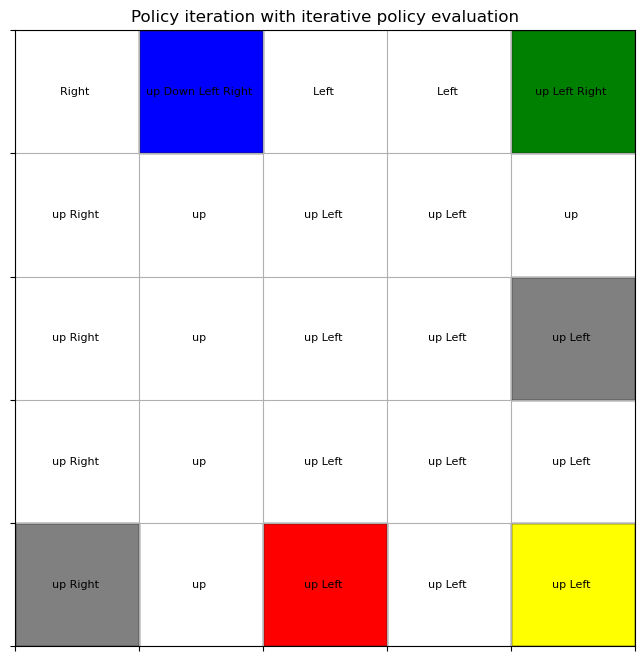

In [49]:
# Iterative policy evaluation
# Policy evaluation
def policy_evaluation(policy, V, threshold=1e-6):
    global per1, per2, special_states
    while True:
        delta = 0
        for x in range(grid_size):
            for y in range(grid_size):
                v = V[x, y]
                new_v = 0
                action = policy[(x, y)]
                (new_x, new_y), reward = get_next_state_and_reward((x, y), action)
                new_v = reward + gamma * V[new_x, new_y]
                V[x, y] = new_v
                delta = max(delta, abs(v - new_v))

        # permute position after one step run with probability of 0.1
        per1, per2, special_states = permute_location(per1, per2, special_states)
        # print(per1)
        if delta < threshold:   
            break
    return V

# Policy improvement
def policy_improvement(policy, V):
    while True:
        V = policy_evaluation(policy, V)
        policy_stable = True
        for x in range(grid_size):
            for y in range(grid_size):
                old_action = policy[(x, y)]
                action_values = []
                for action in actions:
                    (new_x, new_y), reward = get_next_state_and_reward((x, y), action)
                    action_values.append(reward + gamma * V[new_x, new_y])
                best_action = actions[np.argmax(action_values)]
                policy[(x, y)] = best_action
                if old_action != best_action:
                    policy_stable = False
        if policy_stable:
            break
    return policy, V

# Initialize and execute
V_policy_iter = np.zeros((grid_size, grid_size))
policy_iter = {state: np.random.choice(actions) for state in policy} #generate random policy for all states
policy_iter, V_policy_iter = policy_improvement(policy_iter, V_policy_iter)
print(V_policy_iter)

# Find multiple optimal actions
for x in range(grid_size):
        for y in range(grid_size):
            action_values = []
            for action in actions:
                (new_x, new_y), reward = get_next_state_and_reward((x, y), action)
                action_values.append(reward + gamma * V_policy_iter[new_x, new_y])
            best_action=action_search(np.ceil(action_values * 10) / 10)
            # best_action = actions[np.argmax(action_values)]
            policy_iter[(x, y)] = best_action

# Plot optimum policy
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = policy_iter[x, y]
plot_gridworld(OA,"Policy iteration with iterative policy evaluation")

Method 2

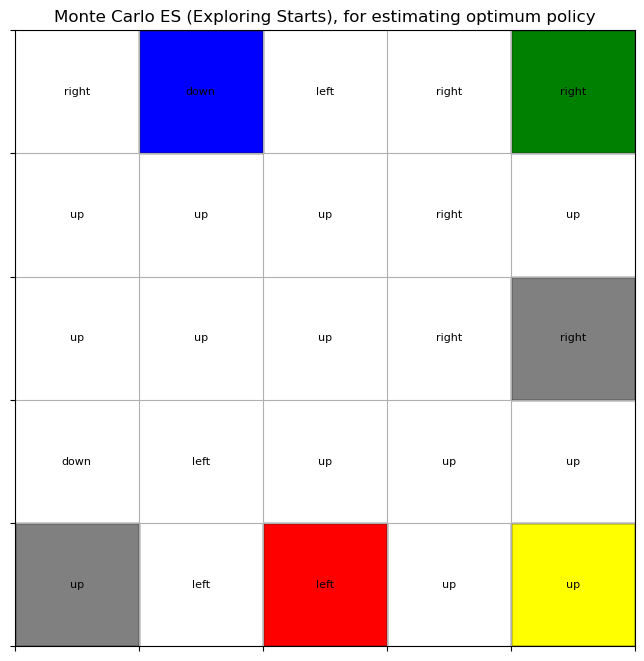

In [56]:
# MC with exploring starts
# Initialize
Q={}
returns={}
policy={}
for y in range(grid_size):
    for x in range(grid_size):
        state = (y, x)
        returns[state] = {a: [] for a in actions}
        Q[state] = {a: 0 for a in actions}
        policy[state] = random.choice(actions)

# Loop forever (for each episode)
for _ in range(10000):
    start=Random_start()
    episodes=generate_episode(start)
    G=0
    k=0
    for state, action, reward in reversed(episodes):
        G = gamma * G + reward
        if (state, action) not in [(x[0], x[1]) for x in episodes[:-(k+1)]]:
            returns[state][action].append(G)
            Q[state][action] = np.mean(returns[state][action])
            policy[state] = max(Q[state], key=Q[state].get)
        k+=1

# Print optimum policy
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = policy[x, y]
plot_gridworld(OA,"Monte Carlo ES (Exploring Starts), for estimating optimum policy")